# Survival Analysis Handball Athletes

Handball has evolved alongside with consolidation of sport’s culture. The present study aims to explore the retention and dropout of handball federated athletes in Portugal. Results from the survival analyses indicate a median length of stay of the athletes is two years, with an associated probability of 41% to continue more than that period. It is also evident that there is an average of 3 years of being registered as an active player.

The sample consisted of 133,717 handball players who were registered at least for one year (female n = 47653, mean age = 23.76, SD=6.79 years; and males n = 86064, mean age = 24.70, SD=7.89 years); data corresponded to the time period between August 1, 1997 and July 31, 2018, mainly with Portuguese nationality (99,96%). The main categories were Seniors (68,6%), U-18 (8,2%), Masters (8,1%), U-16 (4,8%), U-14 (4,2%) and other (6,1%) like: U-12, U-10, U-8 and U-6.

The variables were extracted from the management software of the federation correspond to the time interval of the athlete inscription until the end of observation (censoring on July 31, 2018) or the end of the athlete relationship (dropout). All athletes without an inscription before 2018 were considered that dropout. The survival time in the dataset is represented by the number of years an athlete remains registered. The data provided was been purged from element registered before 1997.

Descriptive statistics were conducted to summarize the variables under analysis.  The survival curve was measured to simplify the interpretation of the survival analysis.  Data processing was conducted using Python (Continuum Analytics, 2016) and Pandas (McKinney & others, 2010).  The Kaplan-Meier estimator was used to gather information about the dropout event and to estimate the survival (Efron, 1988), the log-rank was applied in the scale variables transformed to categorical using the quartiles to provide a statistical comparison of groups and the categorical variable associations was analyzed considering the bigger associations and lower dimension where grouped to simplify the analysis. The survival analysis was conducted using the package Lifelines (Cameron Davidson-Pilon et al., 2017).

Using the logrank test, we identified significant differences between the groups in each variable: age (χ2= 4185.70, p<0.01), gender (χ2=903.87 p<0.01), category (χ2= 10024.28, p<0.01), and associations (χ2= 1395.92, p<0.01). There weren’t significant differences in the variable country (χ2=0.6, p>0.05),

According to our results, the probability of the individuals continue sports participation for more than 12 months is 53%.

# Data Analysis

In [10]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.offline as py


dt = pd.read_csv('https://raw.githubusercontent.com/pesobreiro/jupyternotebooks/master/dados/dadosAtletasAndebol.csv',
                 index_col=0)

plt.rcParams['figure.figsize'] = [10, 15]
datetime.datetime.now()

datetime.datetime(2020, 2, 7, 10, 51, 35, 403308)

In [128]:
def curvaSobrevivencia(dados,coluna,T,C,eixoX=None,eixoY=None,titulo=None):
    ax = plt.subplot(111)
    ax.set_xlabel(eixoX)
    ax.set_ylabel(eixoY)
    ax.set_title(titulo)

    plt.rcParams['figure.figsize'] = [15, 5]
    for item in dados[coluna].unique():
        ix = dados[coluna] == item
        kmf.fit(T.loc[ix], C.loc[ix], label=str(item))
        ax = kmf.plot(ax=ax)
        print('probabilidade de sobreviver:',item,' ',kmf.survival_function_.head())
        print('median:',item,kmf.median_)
    return kmf

In [12]:
def barras(x,dados,titulo,hue=None,orientacao=None,tamanho=[10,5]):
    plt.rcParams['figure.figsize'] = tamanho
    ax = sns.countplot(x=x,data=dados,hue=hue,palette='Blues',orient=orientacao);
    ax.set_title(titulo)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1}'.format(height),ha="left")    
    plt.show()

## Survival Analysis

In [13]:
dados=dt.dropna()
dt = dados.copy()

## Vamos considerar os atletas federados entre desde 2008 e 2012

dt=dt.loc[(dt.dtIns >= "1997-08-01")&(dt.dtIns < "2018-07-31")]

In [24]:
# Vamos considerar um escalao com todos os géneros
dt['escFedTodos'] = dt['escFederacao'].str.split().str.get(0)
#Converter data inscrição para data e hora
dt['dtIns']=pd.to_datetime(dt['dtIns'])

dt2008=dt.loc[(dt.dtIns >= "2008-08-01")&(dt.dtIns < "2018-07-31")]
dt2012=dt.loc[(dt.dtIns >= "2012-01-01")&(dt.dtIns < "2018-07-31")]

In [25]:
dt.escFedTodos.unique()

array(['Veteranos', 'Juniores', 'Infantis', 'Seniores', 'Juvenis',
       'Minis', 'Pre-Bambi', 'Iniciados', 'Bambis'], dtype=object)

### Atletas por ano desde 2008

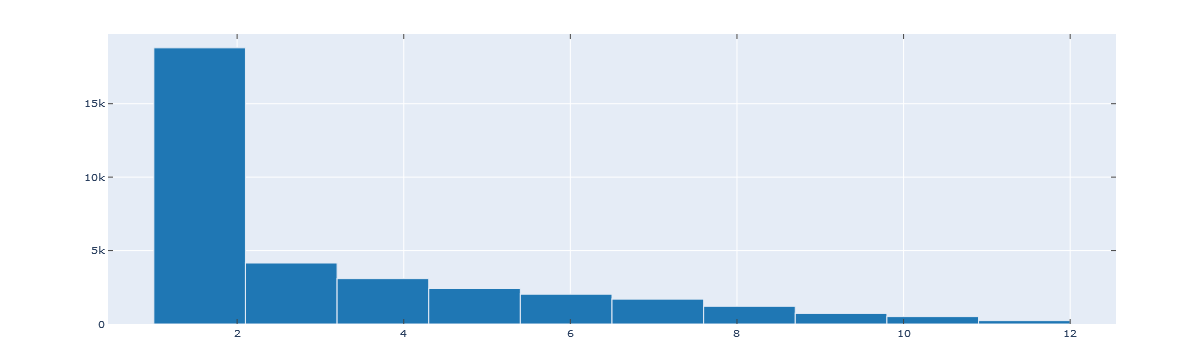

In [179]:
plt.rcParams['figure.figsize'] = [12, 4]
dt2008.anos.hist()

fig = plt.gcf() # "Get current figure"
#plt.show()
py.iplot_mpl(fig)

### Atletas por ano desde 2012

C:\Users\user\Anaconda3\lib\site-packages\plotly\matplotlylib\mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



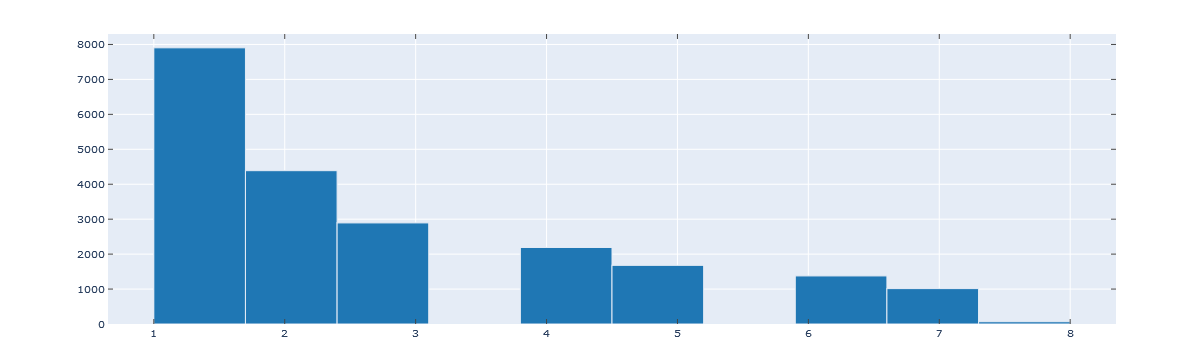

In [178]:
plt.rcParams['figure.figsize'] = [12, 4]
dt2012.anos.hist()

fig = plt.gcf() # "Get current figure"
#plt.show()
py.iplot_mpl(fig)

### Atletas por escalão

In [21]:
dt.escaloesIdade.unique()

array(['mais 60', '10 a 20', '41 a 60', '21 a 40', 'ate 10'], dtype=object)

In [22]:
dt.associacao.unique()

array(['Porto', 'Lisboa', 'Braga', 'V. Castelo', 'Setubal', 'Viseu',
       'Coimbra', 'Aveiro', 'Algarve', 'F.A.P.', 'Evora', 'Leiria',
       'Ilha Terceira', 'Beja', 'Madeira', 'Vila Real', 'Portalegre',
       'Ilha Faial', 'Santarem', 'Castelo Branco', 'Setubal A Praia',
       'Ilha S. Maria', 'Ilha S. Miguel', 'Leiria A Praia', 'Guarda',
       'Braganca', 'Ilha Graciosa', 'Andebol de Praia', 'L.P.A.',
       'Porto A Praia', 'Aveiro A Praia', 'Lisboa A Praia',
       'Madeira A Praia', 'Viseu A Praia', 'Algarve - A 4ALL',
       'Lisboa - A 4ALL', 'SetÃºbal - A 4ALL', 'Aveiro -  4ALL',
       'Leiria - A 4ALL', 'Porto - A 4LL'], dtype=object)

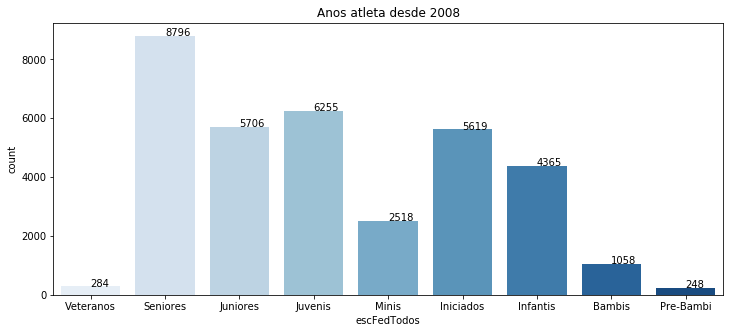

In [33]:
barras(dados=dt2008,titulo='Anos atleta desde 2008',x='escFedTodos',tamanho=[12,5])

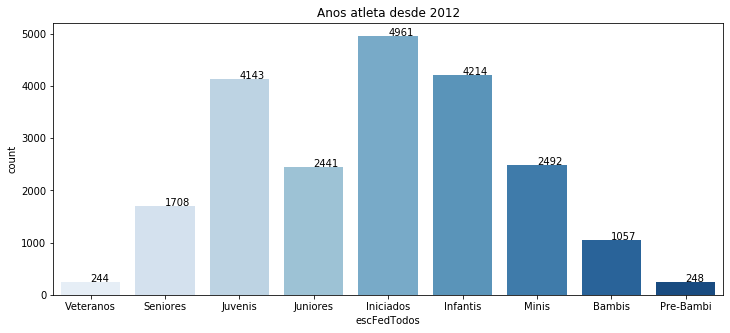

In [29]:
barras(dados=dt2012,titulo='Anos atleta desde 2012',x='escFedTodos',tamanho=[12,5])

### Atletas por anos inscritos

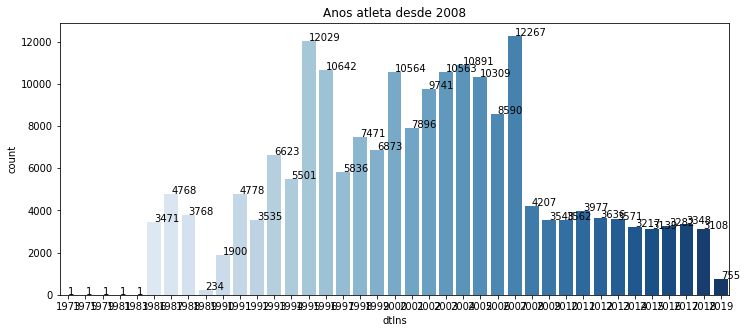

In [31]:
barras(dados=dt2008,titulo='Anos atleta desde 2008',x=dt.dtIns.apply(lambda x: x.date().year),tamanho=[12,5])

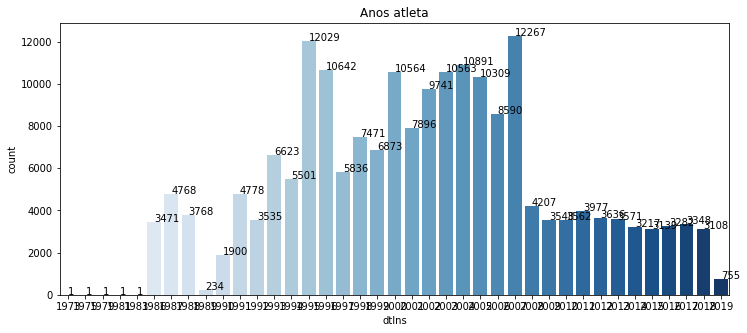

In [32]:
barras(dados=dt2012,titulo='Anos atleta',x=dt.dtIns.apply(lambda x: x.date().year),tamanho=[12,5])

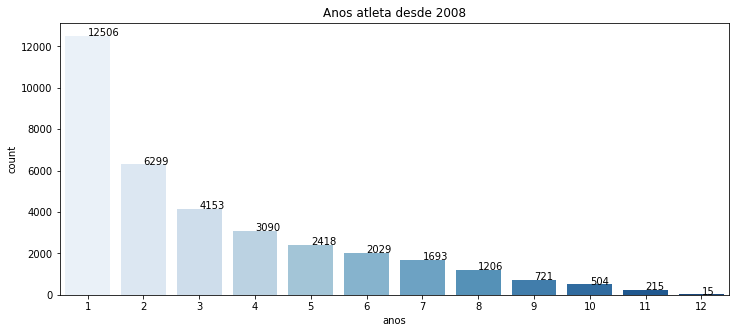

In [104]:
barras(dados=dt2008,titulo='Anos atleta desde 2008',x='anos',tamanho=[12,5])

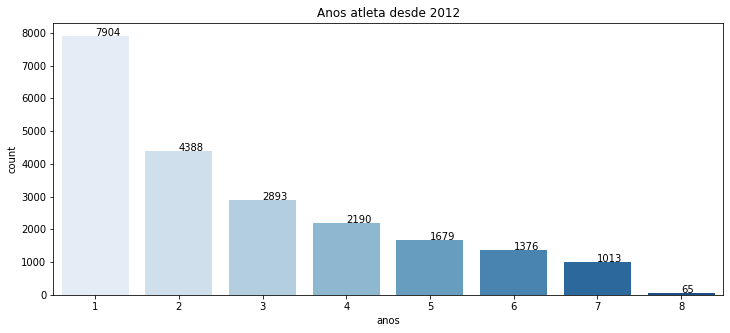

In [105]:
barras(dados=dt2012,titulo='Anos atleta desde 2012',x='anos',tamanho=[12,5])

### Tabela sobrevivência desde 2008

In [109]:
from lifelines import KaplanMeierFitter
kmf2008 = KaplanMeierFitter()
T2008 = dt2008['anos']
C2008 = dt2008['abandonou']
kmf2008.fit(T2008,C2008,label="Abandono dos atletas");

kmf2012 = KaplanMeierFitter()
T2012 = dt2012['anos']
C2012 = dt2012['abandonou']
kmf2012.fit(T2012,C2012,label="Abandono dos atletas");

In [110]:
survivalTable = pd.concat([kmf2008.event_table.reset_index(), kmf2008.conditional_time_to_event_,kmf2008.survival_function_.round(decimals=2)], axis=1)
survivalTable.columns = ['event_at', 'removed', 'observed', 'censored', 'entrance', 'at_risk',
       'time to event', 'prob']
survivalTable.head(18)

#kmf.event_table.head()

,event_at,removed,observed,censored,entrance,at_risk,time to event,prob
0.0,0.0,0,0,0,34849,34849,3.0,1.00
1.0,1.0,12506,11249,1257,0,34849,5.0,0.68
2.0,2.0,6299,4208,2091,0,22343,5.0,0.55
3.0,3.0,4153,2477,1676,0,16044,5.0,0.46
4.0,4.0,3090,1729,1361,0,11891,5.0,0.40
5.0,5.0,2418,1237,1181,0,8801,5.0,0.34
6.0,6.0,2029,863,1166,0,6383,inf,0.30
7.0,7.0,1693,680,1013,0,4354,inf,0.25
8.0,8.0,1206,382,824,0,2661,inf,0.21
9.0,9.0,721,193,528,0,1455,inf,0.19


### Tabela de sobrevivência desde 2012

In [111]:
survivalTable = pd.concat([kmf2012.event_table.reset_index(), kmf2012.conditional_time_to_event_,kmf2012.survival_function_.round(decimals=2)], axis=1)
survivalTable.columns = ['event_at', 'removed', 'observed', 'censored', 'entrance', 'at_risk',
       'time to event', 'prob']
survivalTable.head(18)

#kmf.event_table.head()

,event_at,removed,observed,censored,entrance,at_risk,time to event,prob
0.0,0.0,0,0,0,21508,21508,3.0,1.00
1.0,1.0,7904,6647,1257,0,21508,inf,0.69
2.0,2.0,4388,2297,2091,0,13604,inf,0.57
3.0,3.0,2893,1217,1676,0,9216,inf,0.50
4.0,4.0,2190,829,1361,0,6323,inf,0.43
5.0,5.0,1679,498,1181,0,4133,inf,0.38
6.0,6.0,1376,210,1166,0,2454,inf,0.35
7.0,7.0,1013,0,1013,0,1078,inf,0.35
8.0,8.0,65,0,65,0,65,inf,0.35


### A mediana de anos tempo permanência

A mediana de sobrevivência aumentou 1 ano. Se considerarmos os dados todos é de 2 anos.

In [113]:
print('Mediana sobrevivência desde 2008:',kmf2008.median_)
print('Mediana anos:',dt2008['anos'].median())

print('Mediana sobrevivência desde 2012:',kmf2012.median_)
print('Mediana anos:',dt2012['anos'].median())

Mediana sobrevivência desde 2008: 3.0
Mediana anos: 2.0
Mediana sobrevivência desde 2012: 3.0
Mediana anos: 2.0


### S(t) == P(T>t) probabilidade de viver mais do que 3 anos desde 2008

In [116]:
kmf2008.predict(3.0)

0.4648030065771845

### S(t) == P(T>t) probabilidade de viver mais do que 3 anos desde 2012

In [117]:
kmf2012.predict(3.0)

0.49845046558428574

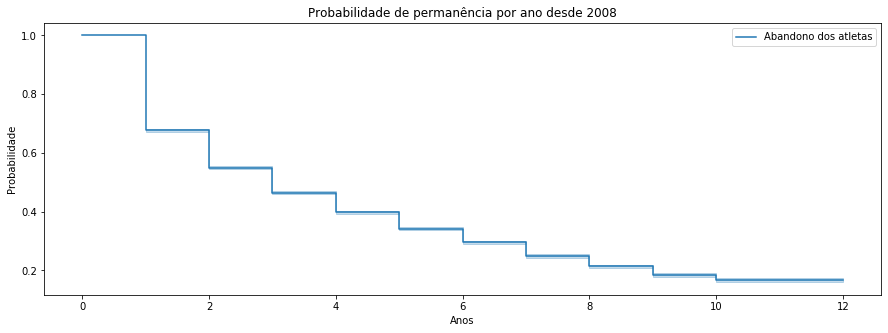

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
kmf2008.plot();
plt.title('Probabilidade de permanência por ano desde 2008')
plt.xlabel('Anos')
plt.ylabel('Probabilidade');

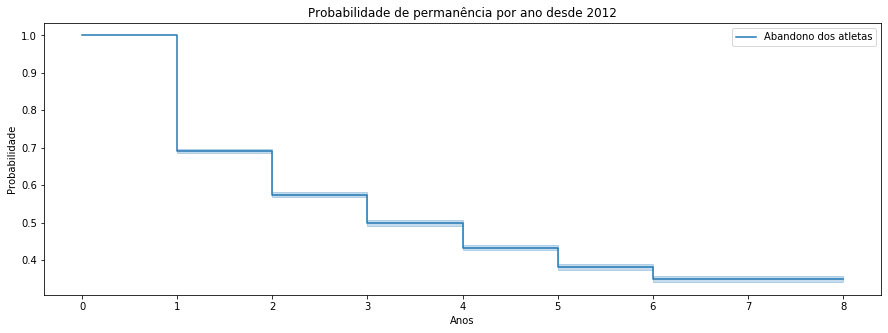

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
kmf2012.plot();
plt.title('Probabilidade de permanência por ano desde 2012')
plt.xlabel('Anos')
plt.ylabel('Probabilidade');

A grande maioria dos atletas federados só fica um ano. 

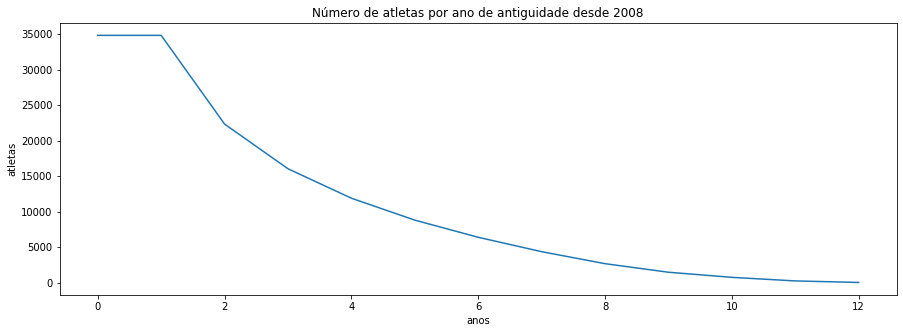

In [120]:
abandono=kmf2008.event_table.reset_index()

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(abandono.event_at, abandono.at_risk);
plt.title('Número de atletas por ano de antiguidade desde 2008') 
plt.xlabel('anos')
plt.ylabel('atletas');
#plt.xlabel()

34849


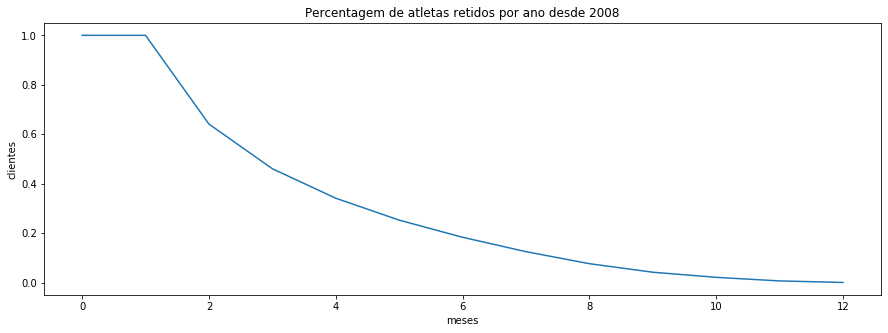

In [121]:
abandono['percentagemClientes']= 0.0
anterior = abandono.at_risk[0:1]
anterior = anterior[0]
print(anterior)

for index, row in abandono.iterrows():
    abandono.at[index, 'percentagemClientes'] = row.at_risk/anterior    

plt.title('Percentagem de atletas retidos por ano desde 2008')
plt.rcParams['figure.figsize'] = [15, 5]
plt.xlabel('meses')
plt.ylabel('clientes')
plt.plot(abandono.event_at, abandono.percentagemClientes)
plt.show()

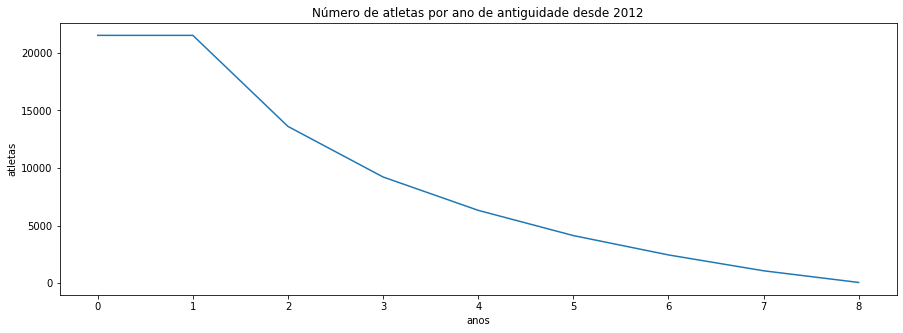

In [122]:
abandono=kmf2012.event_table.reset_index()

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(abandono.event_at, abandono.at_risk);
plt.title('Número de atletas por ano de antiguidade desde 2012') 
plt.xlabel('anos')
plt.ylabel('atletas');
#plt.xlabel()

21508


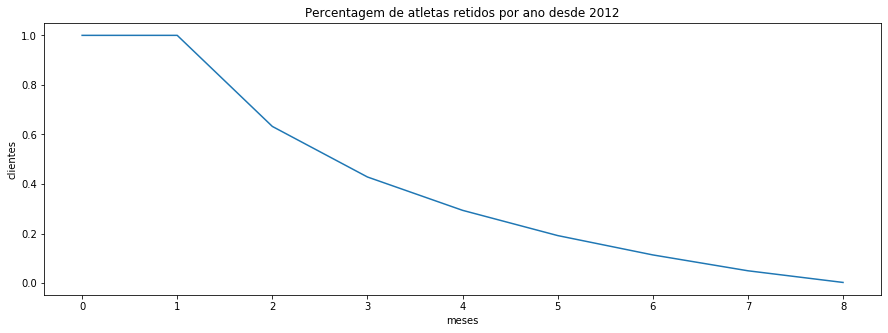

In [123]:
abandono['percentagemClientes']= 0.0
anterior = abandono.at_risk[0:1]
anterior = anterior[0]
print(anterior)

for index, row in abandono.iterrows():
    abandono.at[index, 'percentagemClientes'] = row.at_risk/anterior    

plt.title('Percentagem de atletas retidos por ano desde 2012')
plt.rcParams['figure.figsize'] = [15, 5]
plt.xlabel('meses')
plt.ylabel('clientes')
plt.plot(abandono.event_at, abandono.percentagemClientes)
plt.show()

### Curvas de sobrevivencia

In [124]:
# Importar bibliotecas
from lifelines.statistics import pairwise_logrank_test
from lifelines.statistics import multivariate_logrank_test

#### Por género

M    132729
F     64876
Name: sexo, dtype: int64
probabilidade de sobreviver: M                    M
timeline          
0.0       1.000000
1.0       0.683956
2.0       0.559355
3.0       0.476593
4.0       0.410372
median: M 3.0
probabilidade de sobreviver: F                    F
timeline          
0.0       1.000000
1.0       0.663508
2.0       0.529859
3.0       0.440678
4.0       0.370047
median: F 3.0


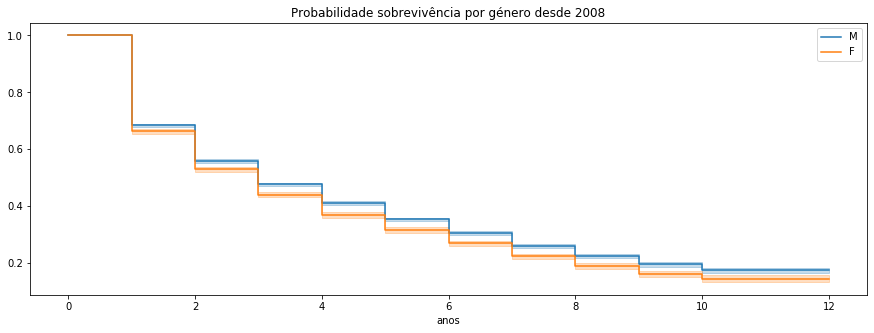

In [129]:
print(dt.sexo.value_counts())
curvaSobrevivencia(dt2008,'sexo',T=T2008,C=C2008,eixoX='anos',titulo='Probabilidade sobrevivência por género desde 2008');plt.xlabel('anos');

In [126]:
results=multivariate_logrank_test(event_durations=T2008,groups=dt2008['sexo'],event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          50.58 <0.005     39.67


M    132729
F     64876
Name: sexo, dtype: int64
probabilidade de sobreviver: M                    M
timeline          
0.0       1.000000
1.0       0.696714
2.0       0.582574
3.0       0.507190
4.0       0.442142
median: M 4.0
probabilidade de sobreviver: F                    F
timeline          
0.0       1.000000
1.0       0.679443
2.0       0.557567
3.0       0.480817
4.0       0.414676
median: F 3.0


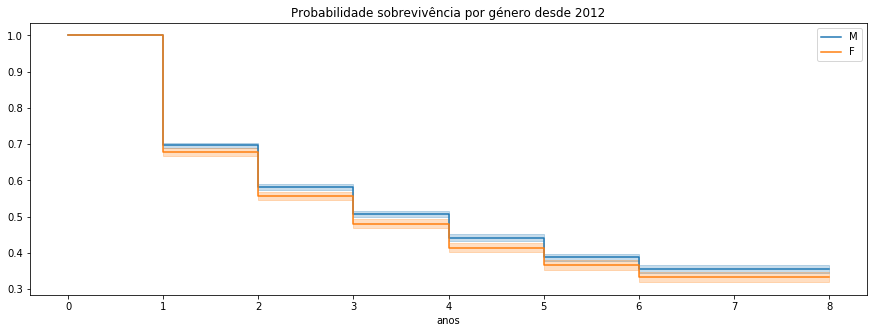

In [130]:
print(dt.sexo.value_counts())
curvaSobrevivencia(dt2012,'sexo',eixoX='anos',T=T2012,C=C2012,titulo='Probabilidade sobrevivência por género desde 2012');plt.xlabel('anos');

In [90]:
results=multivariate_logrank_test(event_durations=T2012,groups=dt2012['sexo'],event_observed=C2012)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          12.56 <0.005     11.31


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [92]:
results=pairwise_logrank_test(event_durations=T2012,groups=dt2012.sexo,event_observed=C2012)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
F M           12.56 <0.005     11.31


#### Por país

Portugal          197542
Resto do mundo        34
Europa                29
Name: pais, dtype: int64
probabilidade de sobreviver: Portugal             Portugal
timeline          
0.0       1.000000
1.0       0.677491
2.0       0.549945
3.0       0.465088
4.0       0.397444
median: Portugal 3.0
probabilidade de sobreviver: Resto do mundo             Resto do mundo
timeline                
0.0             1.000000
1.0             0.370370
3.0             0.296296
4.0             0.296296
6.0             0.222222
median: Resto do mundo 1.0
probabilidade de sobreviver: Europa               Europa
timeline          
0.0       1.000000
1.0       0.608696
2.0       0.327759
3.0       0.234114
4.0       0.175585
median: Europa 2.0


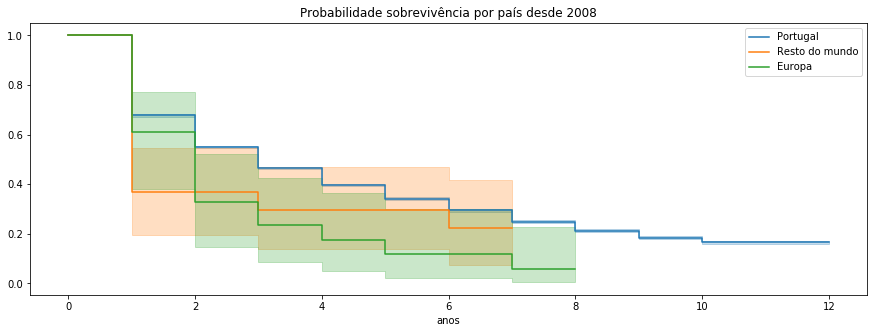

In [131]:
print(dt.pais.value_counts())
curvaSobrevivencia(dt2008,'pais',T=T2008,C=C2008,eixoX='anos',titulo='Probabilidade sobrevivência por país desde 2008');plt.xlabel('anos');

In [94]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2008,groups=dt2008['pais'],event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2

---
 test_statistic    p  -log2(p)
           8.41 0.01      6.06


**Existem diferenças entre as curvas de sobrevivência.**

In [64]:
results=pairwise_logrank_test(event_durations=T,groups=dt.pais,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic    p  -log2(p)
Europa   Portugal                  5.70 0.02      5.88
         Resto do mundo            0.34 0.56      0.84
Portugal Resto do mundo            2.71 0.10      3.33


Portugal          197542
Resto do mundo        34
Europa                29
Name: pais, dtype: int64
probabilidade de sobreviver: Portugal             Portugal
timeline          
0.0       1.000000
1.0       0.691315
2.0       0.574570
3.0       0.498785
4.0       0.433328
median: Portugal 3.0
probabilidade de sobreviver: Resto do mundo             Resto do mundo
timeline                
0.0             1.000000
1.0             0.409091
3.0             0.363636
4.0             0.363636
6.0             0.272727
median: Resto do mundo 1.0
probabilidade de sobreviver: Europa               Europa
timeline          
0.0       1.000000
1.0       0.545455
2.0       0.327273
3.0       0.109091
median: Europa 2.0


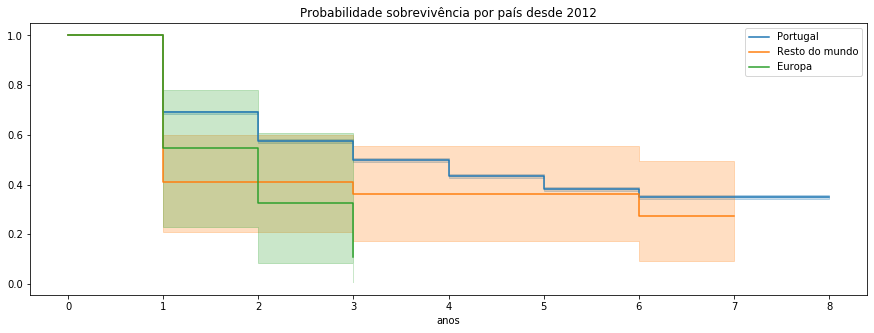

In [132]:
print(dt.pais.value_counts())
curvaSobrevivencia(dt2012,'pais',T=T2012,C=C2012,eixoX='anos',titulo='Probabilidade sobrevivência por país desde 2012');plt.xlabel('anos');

In [133]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2012,groups=dt2012['pais'],event_observed=C2012)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2

---
 test_statistic    p  -log2(p)
           7.40 0.02      5.34


#### Por nacionalidade

Portugal          197542
Resto do mundo        34
Europa                29
Name: pais, dtype: int64
probabilidade de sobreviver: Portugal             Portugal
timeline          
0.0       1.000000
1.0       0.692982
2.0       0.576779
3.0       0.501235
4.0       0.435575
median: Portugal 4.0
probabilidade de sobreviver: ND              ND
timeline     
0.0       1.0
1.0       0.0
median: ND 1.0
probabilidade de sobreviver: Europa               Europa
timeline          
0.0       1.000000
1.0       0.587121
2.0       0.437304
3.0       0.347962
4.0       0.301567
median: Europa 2.0
probabilidade de sobreviver: Resto do mundo             Resto do mundo
timeline                
0.0             1.000000
1.0             0.663793
2.0             0.541872
3.0             0.457861
4.0             0.394269
median: Resto do mundo 3.0


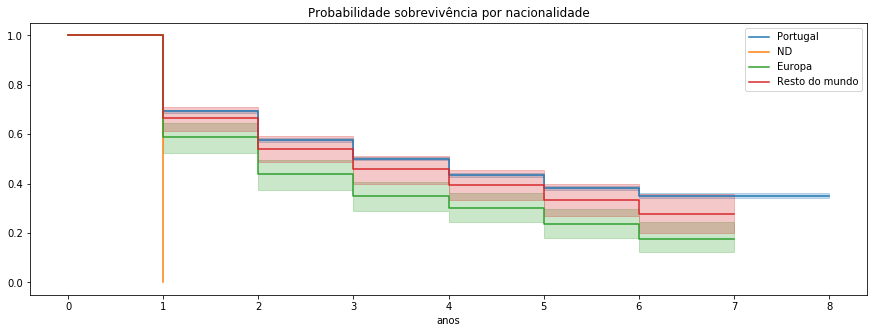

In [98]:
print(dt.pais.value_counts())
curvaSobrevivencia(dt2008,'nacionalidade',eixoX='anos',titulo='Probabilidade sobrevivência por nacionalidade');plt.xlabel('anos');

In [66]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2008,groups=dt2008['nacionalidade'],event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
         117.15 <0.005     81.38


Portugal          197542
Resto do mundo        34
Europa                29
Name: pais, dtype: int64
probabilidade de sobreviver: Portugal             Portugal
timeline          
0.0       1.000000
1.0       0.692982
2.0       0.576779
3.0       0.501235
4.0       0.435575
median: Portugal 4.0
probabilidade de sobreviver: Resto do mundo             Resto do mundo
timeline                
0.0             1.000000
1.0             0.663793
2.0             0.541872
3.0             0.457861
4.0             0.394269
median: Resto do mundo 3.0
probabilidade de sobreviver: Europa               Europa
timeline          
0.0       1.000000
1.0       0.587121
2.0       0.437304
3.0       0.347962
4.0       0.301567
median: Europa 2.0
probabilidade de sobreviver: ND              ND
timeline     
0.0       1.0
1.0       0.0
median: ND 1.0


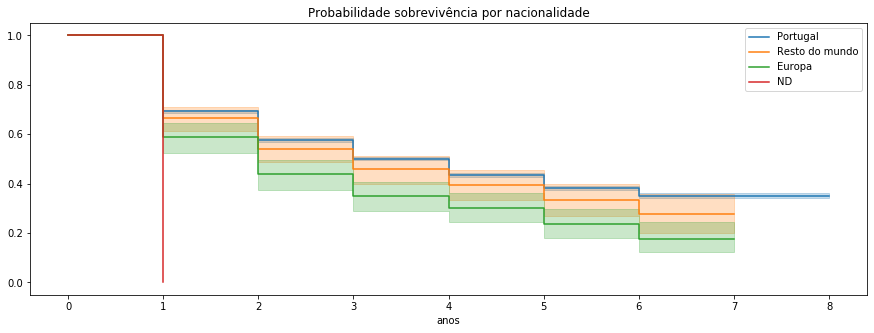

In [134]:
print(dt.pais.value_counts())
curvaSobrevivencia(dt2012,'nacionalidade',T=T2012,C=C2012,eixoX='anos',titulo='Probabilidade sobrevivência por nacionalidade');plt.xlabel('anos');

In [100]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2012,groups=dt2012['nacionalidade'],event_observed=C2012)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
          51.08 <0.005     34.31


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [101]:
results=pairwise_logrank_test(event_durations=T2012,groups=dt2012.nacionalidade,event_observed=C2012)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic      p  -log2(p)
Europa   ND                       10.88 <0.005     10.01
         Portugal                 30.42 <0.005     24.78
         Resto do mundo            7.40   0.01      7.26
ND       Portugal                 18.04 <0.005     15.50
         Resto do mundo           15.08 <0.005     13.25
Portugal Resto do mundo            3.05   0.08      3.63


**Correr novamente os testes sem os NDs**

## Por associacoes 2008

Vamos considerar só associações com mais de 2000 federados

In [137]:
associacoes=['Porto','Lisboa','Aveiro','Braga','Madeira','Viseu','Leiria']
dtAssociacoes2008=dt2008.loc[dt2008['associacao'].isin(associacoes)]

In [136]:
dtAssociacoes2008.associacao.value_counts()

Porto      7114
Lisboa     4092
Aveiro     3453
Braga      2993
Madeira    2570
Viseu      2475
Leiria     2278
Name: associacao, dtype: int64

probabilidade de sobreviver: Porto                Porto
timeline          
0.0       1.000000
1.0       0.703823
2.0       0.585492
3.0       0.508137
4.0       0.450381
median: Porto 4.0
probabilidade de sobreviver: Lisboa               Lisboa
timeline          
0.0       1.000000
1.0       0.635142
2.0       0.506910
3.0       0.423994
4.0       0.365250
median: Lisboa 3.0
probabilidade de sobreviver: Madeira              Madeira
timeline          
0.0       1.000000
1.0       0.590661
2.0       0.447483
3.0       0.363610
4.0       0.312606
median: Madeira 2.0
probabilidade de sobreviver: Aveiro               Aveiro
timeline          
0.0       1.000000
1.0       0.701129
2.0       0.579838
3.0       0.499389
4.0       0.449831
median: Aveiro 3.0
probabilidade de sobreviver: Viseu                Viseu
timeline          
0.0       1.000000
1.0       0.793939
2.0       0.697055
3.0       0.601006
4.0       0.511256
median: Viseu 5.0
probabilidade de sobreviver: Braga                Br

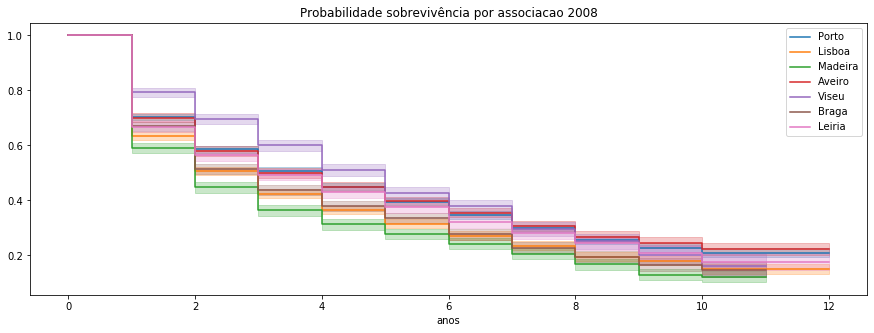

In [141]:
T2008 = dtAssociacoes2008['anos']
C2008 = dtAssociacoes2008['abandonou']
kmf.fit(T2008,C2008,label="Abandono dos atletas")
curvaSobrevivencia(dtAssociacoes2008,'associacao',T=T2008,C=C2008,eixoX='anos',
                   titulo='Probabilidade sobrevivência por associacao 2008');
plt.xlabel('anos');

In [143]:
dt2008.associacao.value_counts()

Porto                7114
Lisboa               4092
Aveiro               3453
Braga                2993
Madeira              2570
Viseu                2475
Leiria               2278
Algarve              1720
Setubal              1716
Santarem             1643
Guarda                526
Vila Real             510
Beja                  490
Ilha S. Miguel        431
Ilha Terceira         420
Portalegre            398
Ilha Faial            360
Evora                 337
Coimbra               327
Castelo Branco        230
Ilha S. Maria         214
V. Castelo            109
Ilha Graciosa         108
Leiria A Praia         90
Braganca               71
Porto A Praia          41
SetÃºbal - A 4ALL      19
Andebol de Praia       13
Porto - A 4LL          12
Aveiro -  4ALL         12
Lisboa A Praia         12
Algarve - A 4ALL       11
Lisboa - A 4ALL        11
Leiria - A 4ALL        11
Viseu A Praia           8
Aveiro A Praia          6
Madeira A Praia         6
L.P.A.                  5
F.A.P.      

Algarve              1720
Setubal              1716
Santarem             1643
Guarda                526
Vila Real             510
Beja                  490
Ilha S. Miguel        431
Ilha Terceira         420
Portalegre            398
Ilha Faial            360
Evora                 337
Coimbra               327
Castelo Branco        230
Ilha S. Maria         214
V. Castelo            109
Ilha Graciosa         108
Leiria A Praia         90
Braganca               71

In [144]:
associacoes=['Algarve','Setubal','Santarem','Guarda','Vila Real','Beja','Ilha S. Miguel','Ilha Terceira','Portalegre',
             'Ilha Faial','Evora','Coimbra','Castelo Branco','Ilha S. Maria','V. Castelo','Ilha Graciosa','Braganca']
dtAssociacoes2008=dt2008.loc[dt2008['associacao'].isin(associacoes)]

In [73]:
dtAssociacoes2008.associacao.value_counts()

Algarve           1720
Setubal           1716
Santarem          1643
Guarda             526
Vila Real          510
Beja               490
Ilha S. Miguel     431
Ilha Terceira      420
Portalegre         398
Ilha Faial         360
Evora              337
Coimbra            327
Castelo Branco     230
Ilha S. Maria      214
V. Castelo         109
Ilha Graciosa      108
Braganca            71
Name: associacao, dtype: int64

probabilidade de sobreviver: Santarem             Santarem
timeline          
0.0       1.000000
1.0       0.642727
2.0       0.494598
3.0       0.407041
4.0       0.348060
median: Santarem 2.0
probabilidade de sobreviver: V. Castelo             V. Castelo
timeline            
0.0         1.000000
1.0         0.458716
2.0         0.305810
3.0         0.215200
4.0         0.181221
median: V. Castelo 1.0
probabilidade de sobreviver: Portalegre             Portalegre
timeline            
0.0         1.000000
1.0         0.660804
2.0         0.526000
3.0         0.454142
4.0         0.371269
median: Portalegre 3.0
probabilidade de sobreviver: Algarve              Algarve
timeline          
0.0       1.000000
1.0       0.641860
2.0       0.506229
3.0       0.401261
4.0       0.338352
median: Algarve 3.0
probabilidade de sobreviver: Evora                Evora
timeline          
0.0       1.000000
1.0       0.729970
2.0       0.628756
3.0       0.543017
4.0       0.440172
median: Evora 4.0
pr

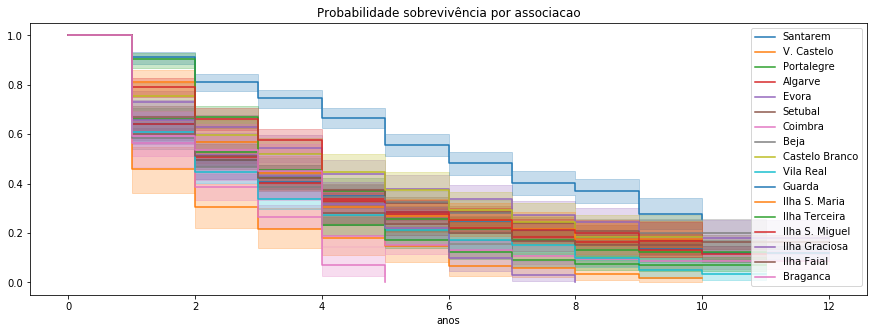

In [146]:
T2008 = dtAssociacoes2008['anos']
C2008 = dtAssociacoes2008['abandonou']
kmf.fit(T2008,C2008,label="Abandono dos atletas")
curvaSobrevivencia(dtAssociacoes2008,'associacao',T=T2008,C=C2008,eixoX='anos',titulo='Probabilidade sobrevivência por associacao');
plt.xlabel('anos');

In [147]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2008,groups=dtAssociacoes2008['associacao'],event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 16

---
 test_statistic      p  -log2(p)
         318.05 <0.005    190.47


É maios ou menos igual. Porto e Braga aparentemente com melhores retenções

**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [148]:
results=pairwise_logrank_test(event_durations=T2008,groups=dtAssociacoes2008['associacao'],event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                               test_statistic      p  -log2(p)
Algarve        Beja                      0.01   0.90      0.15
               Braganca                 13.82 <0.005     12.28
               Castelo Branco            9.08 <0.005      8.59
               Coimbra                  22.32 <0.005     18.72
               Evora                    17.55 <0.005     15.13
               Guarda                  153.58 <0.005    114.75
               Ilha Faial                0.08   0.77      0.37
               Ilha Graciosa             4.25   0.04      4.67
               Ilha S. Maria             2.87   0.09      3.47
               Ilha S. Miguel           12.63 <0.005     11.36
               Ilha Terceira             0.05   0.83      0.27
               Portalegre                0.19   0.66      0.60
               Santarem                  0.37   0.54      0.89
   

## Por associacoes 2012

Vamos considerar só associações com mais de 2000 federados

In [149]:
associacoes=['Porto','Lisboa','Aveiro','Braga','Madeira','Viseu','Leiria']
dtAssociacoes2012=dt2012.loc[dt2012['associacao'].isin(associacoes)]

In [150]:
dtAssociacoes2012.associacao.value_counts()

Porto      4629
Lisboa     2445
Braga      2057
Aveiro     1991
Viseu      1666
Madeira    1484
Leiria     1459
Name: associacao, dtype: int64

probabilidade de sobreviver: Porto                Porto
timeline          
0.0       1.000000
1.0       0.716137
2.0       0.608786
3.0       0.540630
4.0       0.485947
median: Porto 4.0
probabilidade de sobreviver: Lisboa               Lisboa
timeline          
0.0       1.000000
1.0       0.660941
2.0       0.539646
3.0       0.459084
4.0       0.409843
median: Lisboa 3.0
probabilidade de sobreviver: Madeira              Madeira
timeline          
0.0       1.000000
1.0       0.572102
2.0       0.447866
3.0       0.389365
4.0       0.356143
median: Madeira 2.0
probabilidade de sobreviver: Aveiro               Aveiro
timeline          
0.0       1.000000
1.0       0.715218
2.0       0.611265
3.0       0.537836
4.0       0.488113
median: Aveiro 4.0
probabilidade de sobreviver: Viseu                Viseu
timeline          
0.0       1.000000
1.0       0.844538
2.0       0.766219
3.0       0.679533
4.0       0.579523
median: Viseu 5.0
probabilidade de sobreviver: Leiria               Le

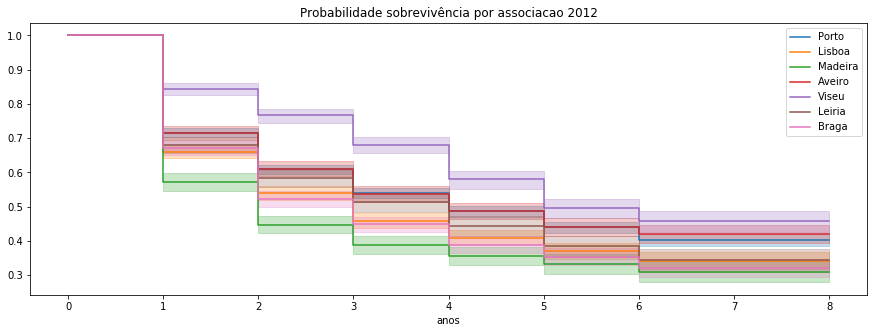

In [151]:
T2012 = dtAssociacoes2012['anos']
C2012 = dtAssociacoes2012['abandonou']
kmf.fit(T2012,C2012,label="Abandono dos atletas")
curvaSobrevivencia(dtAssociacoes2012,'associacao',T=T2012,C=C2012,eixoX='anos',
                   titulo='Probabilidade sobrevivência por associacao 2012');
plt.xlabel('anos');

In [152]:
dt2012.associacao.value_counts()

Porto                4629
Lisboa               2445
Braga                2057
Aveiro               1991
Viseu                1666
Madeira              1484
Leiria               1459
Algarve              1028
Santarem              982
Setubal               971
Beja                  348
Ilha S. Miguel        329
Vila Real             294
Guarda                272
Portalegre            236
Ilha Faial            202
Ilha Terceira         178
Evora                 172
Castelo Branco        153
Ilha S. Maria         134
Coimbra               132
Leiria A Praia         90
Ilha Graciosa          78
Porto A Praia          41
SetÃºbal - A 4ALL      19
Lisboa A Praia         12
Aveiro -  4ALL         12
V. Castelo             12
Porto - A 4LL          12
Leiria - A 4ALL        11
Braganca               11
Algarve - A 4ALL       11
Lisboa - A 4ALL        11
Viseu A Praia           8
Aveiro A Praia          6
Madeira A Praia         6
F.A.P.                  3
Setubal A Praia         3
Name: associ

Algarve              1720
Setubal              1716
Santarem             1643
Guarda                526
Vila Real             510
Beja                  490
Ilha S. Miguel        431
Ilha Terceira         420
Portalegre            398
Ilha Faial            360
Evora                 337
Coimbra               327
Castelo Branco        230
Ilha S. Maria         214
V. Castelo            109
Ilha Graciosa         108
Leiria A Praia         90
Braganca               71

In [153]:
associacoes=['Algarve','Setubal','Santarem','Guarda','Vila Real','Beja','Ilha S. Miguel','Ilha Terceira','Portalegre',
             'Ilha Faial','Evora','Coimbra','Castelo Branco','Ilha S. Maria','V. Castelo','Ilha Graciosa','Braganca']
dtAssociacoes2012=dt2012.loc[dt2012['associacao'].isin(associacoes)]

In [154]:
dtAssociacoes2012.associacao.value_counts()

Algarve           1028
Santarem           982
Setubal            971
Beja               348
Ilha S. Miguel     329
Vila Real          294
Guarda             272
Portalegre         236
Ilha Faial         202
Ilha Terceira      178
Evora              172
Castelo Branco     153
Ilha S. Maria      134
Coimbra            132
Ilha Graciosa       78
V. Castelo          12
Braganca            11
Name: associacao, dtype: int64

probabilidade de sobreviver: Algarve              Algarve
timeline          
0.0       1.000000
1.0       0.685798
2.0       0.556296
3.0       0.459421
4.0       0.412732
median: Algarve 3.0
probabilidade de sobreviver: Santarem             Santarem
timeline          
0.0       1.000000
1.0       0.612016
2.0       0.459281
3.0       0.388995
4.0       0.325837
median: Santarem 2.0
probabilidade de sobreviver: Setubal              Setubal
timeline          
0.0       1.000000
1.0       0.652935
2.0       0.558025
3.0       0.489187
4.0       0.431861
median: Setubal 3.0
probabilidade de sobreviver: Ilha S. Maria             Ilha S. Maria
timeline               
0.0            1.000000
1.0            0.820896
2.0            0.563847
3.0            0.418338
4.0            0.291569
median: Ilha S. Maria 3.0
probabilidade de sobreviver: Vila Real             Vila Real
timeline           
0.0        1.000000
1.0        0.608844
2.0        0.459242
3.0        0.401279
4.0        0.332640
me

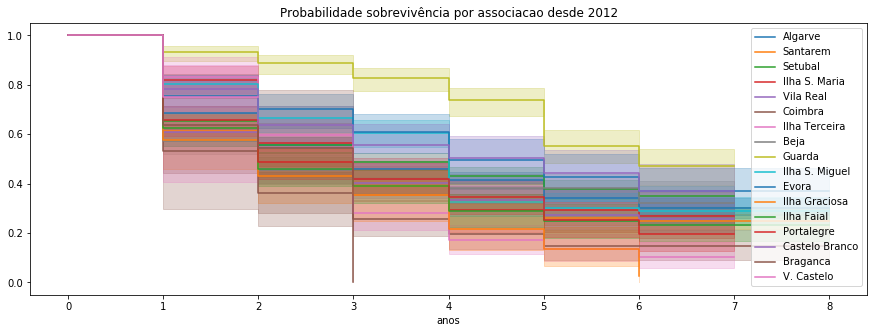

In [155]:
T2012 = dtAssociacoes2012['anos']
C2012 = dtAssociacoes2012['abandonou']
kmf.fit(T2012,C2012,label="Abandono dos atletas")
curvaSobrevivencia(dtAssociacoes2012,'associacao',T=T2012,C=C2012,eixoX='anos',titulo='Probabilidade sobrevivência por associacao desde 2012');
plt.xlabel('anos');

In [156]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2012,groups=dtAssociacoes2012['associacao'],event_observed=C2012)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 16

---
 test_statistic      p  -log2(p)
         205.68 <0.005    113.78


É maios ou menos igual. Porto e Braga aparentemente com melhores retenções

**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [157]:
results=pairwise_logrank_test(event_durations=T2012,groups=dtAssociacoes2012['associacao'],event_observed=C2012)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                               test_statistic      p  -log2(p)
Algarve        Beja                      3.63   0.06      4.14
               Braganca                  6.03   0.01      6.15
               Castelo Branco            4.88   0.03      5.20
               Coimbra                  25.76 <0.005     21.30
               Evora                     7.18   0.01      7.08
               Guarda                   66.19 <0.005     51.12
               Ilha Faial                7.04   0.01      6.97
               Ilha Graciosa            16.82 <0.005     14.57
               Ilha S. Maria             0.07   0.79      0.34
               Ilha S. Miguel            2.22   0.14      2.88
               Ilha Terceira            10.47 <0.005      9.68
               Portalegre                4.40   0.04      4.80
               Santarem                 15.15 <0.005     13.30
   

## Escalões Federação Femininos e Masc

In [158]:
dtFem2008 = dt2008.loc[dt.sexo=='F']
dtMasc2008 = dt2008.loc[dt.sexo=='M']

dtFem2012 = dt2012.loc[dt.sexo=='F']
dtMasc2012 = dt2012.loc[dt.sexo=='M']

probabilidade de sobreviver: Veteranos F             Veteranos F
timeline             
0.0          1.000000
1.0          0.638554
2.0          0.590663
3.0          0.548472
4.0          0.313413
median: Veteranos F 4.0
probabilidade de sobreviver: Seniores F             Seniores F
timeline            
0.0         1.000000
1.0         0.599336
2.0         0.429180
3.0         0.310744
4.0         0.243084
median: Seniores F 2.0
probabilidade de sobreviver: Juniores F             Juniores F
timeline            
0.0         1.000000
1.0         0.655243
2.0         0.510324
3.0         0.424042
4.0         0.340651
median: Juniores F 3.0
probabilidade de sobreviver: Juvenis F             Juvenis F
timeline           
0.0        1.000000
1.0        0.675400
2.0        0.557067
3.0        0.481272
4.0        0.409405
median: Juvenis F 3.0
probabilidade de sobreviver: Iniciados F             Iniciados F
timeline             
0.0          1.000000
1.0          0.700970
2.0          0.596546

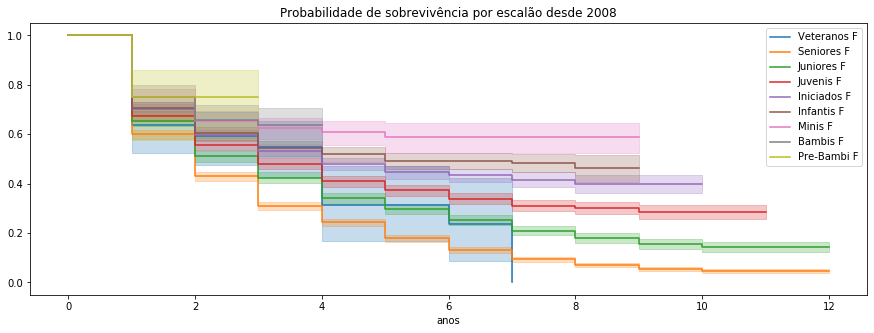

In [160]:
T2008 = dtFem2008['anos']
C2008 = dtFem2008['abandonou']
kmf.fit(T2008,C2008,label="Abandono dos atletas")
curvaSobrevivencia(dtFem2008,'escFederacao',eixoX='anos',C=C2008,T=T2008,titulo='Probabilidade de sobrevivência por escalão desde 2008');plt.xlabel('anos');

In [162]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2008,groups=dtFem2008['escFederacao'],event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 8

---
 test_statistic      p  -log2(p)
         724.14 <0.005    499.43


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [163]:
results=pairwise_logrank_test(event_durations=T2008,groups=dtFem2008.escFederacao,event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic      p  -log2(p)
Bambis F    Infantis F             3.17   0.07      3.74
            Iniciados F            4.34   0.04      4.75
            Juniores F            18.81 <0.005     16.08
            Juvenis F             10.25 <0.005      9.52
            Minis F                0.01   0.91      0.14
            Pre-Bambi F            0.30   0.58      0.78
            Seniores F            44.85 <0.005     35.46
            Veteranos F            3.94   0.05      4.41
Infantis F  Iniciados F            2.03   0.15      2.69
            Juniores F            79.12 <0.005     60.57
            Juvenis F             25.38 <0.005     21.02
            Minis F                7.72   0.01      7.52
            Pre-Bambi F            1.38   0.24      2.06
            Seniores F           269.13 <0.005    198.50
            Veteranos F       

probabilidade de sobreviver: Veteranos M             Veteranos M
timeline             
0.0          1.000000
1.0          0.502488
2.0          0.421441
3.0          0.331773
4.0          0.299666
median: Veteranos M 2.0
probabilidade de sobreviver: Seniores M             Seniores M
timeline            
0.0         1.000000
1.0         0.586798
2.0         0.426230
3.0         0.326844
4.0         0.249895
median: Seniores M 2.0
probabilidade de sobreviver: Juniores M             Juniores M
timeline            
0.0         1.000000
1.0         0.661957
2.0         0.518636
3.0         0.423233
4.0         0.351735
median: Juniores M 3.0
probabilidade de sobreviver: Juvenis M             Juvenis M
timeline           
0.0        1.000000
1.0        0.703624
2.0        0.589340
3.0        0.510190
4.0        0.442501
median: Juvenis M 4.0
probabilidade de sobreviver: Minis M              Minis M
timeline          
0.0       1.000000
1.0       0.748795
2.0       0.651682
3.0       0.603334

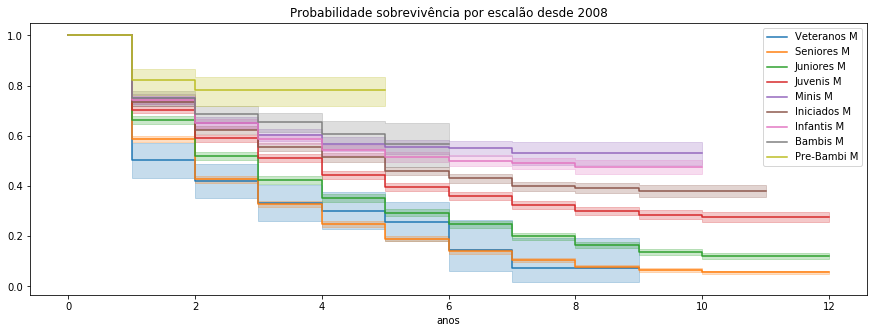

In [165]:
T2008 = dtMasc2008['anos']
C2008 = dtMasc2008['abandonou']
kmf.fit(T2008,C2008,label="Abandono dos atletas desde 2008")
curvaSobrevivencia(dtMasc2008,'escFederacao',T=T2008,C=C2008,eixoX='anos',titulo='Probabilidade sobrevivência por escalão desde 2008');plt.xlabel('anos');

In [167]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T2008,groups=dtMasc2008['escFederacao'],event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 8

---
 test_statistic      p  -log2(p)
        1809.81 <0.005       inf


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [168]:
results=pairwise_logrank_test(event_durations=T2008,groups=dtMasc2008.escFederacao,event_observed=C2008)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                         test_statistic      p  -log2(p)
Bambis M    Infantis M             4.23   0.04      4.66
            Iniciados M           11.57 <0.005     10.55
            Juniores M            81.57 <0.005     62.36
            Juvenis M             30.30 <0.005     24.69
            Minis M                2.00   0.16      2.67
            Pre-Bambi M            7.80   0.01      7.58
            Seniores M           194.55 <0.005    144.47
            Veteranos M           64.33 <0.005     49.75
Infantis M  Iniciados M           14.78 <0.005     13.01
            Juniores M           315.26 <0.005    231.89
            Juvenis M             84.13 <0.005     64.23
            Minis M                1.53   0.22      2.21
            Pre-Bambi M           14.17 <0.005     12.55
            Seniores M           839.94 <0.005    611.08
            Veteranos M       

## Ambos os escalões

probabilidade de sobreviver: Veteranos             Veteranos
timeline           
0.0        1.000000
1.0        0.542254
2.0        0.468866
3.0        0.393847
4.0        0.315078
median: Veteranos 2.0
probabilidade de sobreviver: Seniores             Seniores
timeline          
0.0       1.000000
1.0       0.591452
2.0       0.427293
3.0       0.320729
4.0       0.247303
median: Seniores 2.0
probabilidade de sobreviver: Juniores             Juniores
timeline          
0.0       1.000000
1.0       0.659657
2.0       0.515792
3.0       0.423489
4.0       0.348016
median: Juniores 3.0
probabilidade de sobreviver: Juvenis              Juvenis
timeline          
0.0       1.000000
1.0       0.694325
2.0       0.578740
3.0       0.500698
4.0       0.431781
median: Juvenis 4.0
probabilidade de sobreviver: Minis                Minis
timeline          
0.0       1.000000
1.0       0.749007
2.0       0.652473
3.0       0.607894
4.0       0.575604
median: Minis inf
probabilidade de sobreviver: 

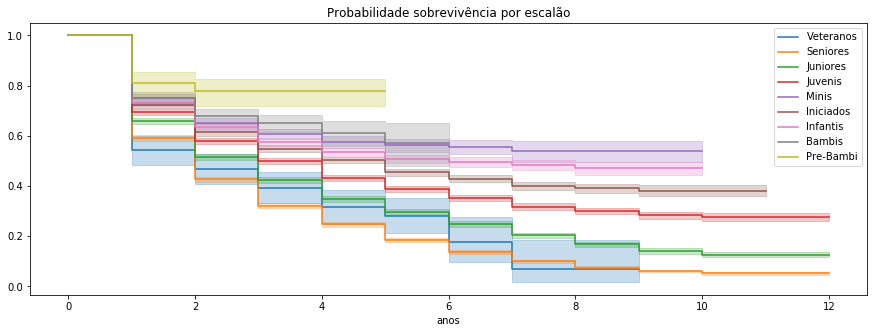

In [84]:
T = dt['anos']
C = dt['abandonou']
kmf.fit(T,C,label="Abandono dos atletas")
curvaSobrevivencia(dt,'escFedTodos',eixoX='anos',titulo='Probabilidade sobrevivência por escalão');plt.xlabel('anos');

## Por tipo de inscrição

probabilidade de sobreviver: primeiraInsc             primeiraInsc
timeline              
0.0           1.000000
1.0           0.677338
2.0           0.549780
3.0           0.464932
4.0           0.397379
median: primeiraInsc 3.0
probabilidade de sobreviver: revalComTransf             revalComTransf
timeline                
0.0             1.000000
1.0             0.416667
2.0             0.333333
3.0             0.166667
5.0             0.166667
median: revalComTransf 1.0
probabilidade de sobreviver: revalidacao             revalidacao
timeline             
0.0              1.00
1.0              0.75
2.0              0.50
4.0              0.25
5.0              0.25
median: revalidacao 2.0
probabilidade de sobreviver: naoDefinido             naoDefinido
timeline             
0.0               1.0
1.0               0.0
median: naoDefinido 1.0
probabilidade de sobreviver: selecao             selecao
timeline         
0.0          1.00
1.0          0.25
4.0          0.00
median: selecao 1

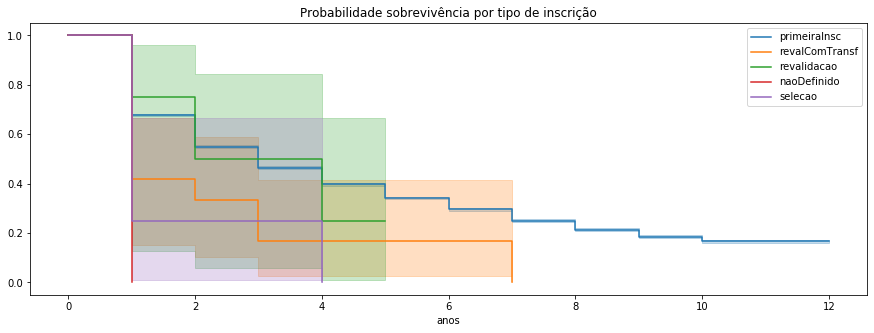

In [85]:
T = dt['anos']
C = dt['abandonou']
curvaSobrevivencia(dt,'tipoInscricao',eixoX='anos',titulo='Probabilidade sobrevivência por tipo de inscrição');plt.xlabel('anos');

In [86]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt['tipoInscricao'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4

---
 test_statistic    p  -log2(p)
          10.79 0.03      5.11


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [87]:
results=pairwise_logrank_test(event_durations=T,groups=dt.tipoInscricao,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                               test_statistic    p  -log2(p)
naoDefinido    primeiraInsc              2.10 0.15      2.76
               revalComTransf            0.62 0.43      1.22
               revalidacao               1.50 0.22      2.18
               selecao                   0.25 0.62      0.70
primeiraInsc   revalComTransf            4.76 0.03      5.10
               revalidacao               0.08 0.77      0.37
               selecao                   3.85 0.05      4.33
revalComTransf revalidacao               0.46 0.50      1.01
               selecao                   0.27 0.61      0.72
revalidacao    selecao                   1.20 0.27      1.87


# Vamos ver este mandato em relação aos anteriores

In [169]:
dt.loc[:,'esteMandato']=0

In [170]:
dt.dtIns=pd.to_datetime(dt.dtIns)
dt.loc[:,'anoInsc']=0
dt['anoInsc']=dt['dtIns'].apply(lambda x: x.year)

In [171]:
dt.columns

Index(['CIPA', 'associacao', 'clube', 'dtIns', 'escalao', 'escalaoSubida',
       'sexo', 'dtNasc', 'codPostal', 'localidade', 'pais', 'nacionalidade',
       'epoca', 'tipoInscricao', 'dtInsc', 'dtUlt', 'anos', 'idade',
       'abandonou', 'escaloesAnos', 'mes', 'escaloesIdade', 'anoNasc',
       'escFederacao', 'escFedTodos', 'esteMandato', 'anoInsc'],
      dtype='object')

In [172]:
dt.loc[dt.anoInsc >= 2012,'esteMandato'] = 1

In [173]:
dt.esteMandato.value_counts()

0    173549
1     24056
Name: esteMandato, dtype: int64

probabilidade de sobreviver: 0                    0
timeline          
0.0       1.000000
1.0       0.439962
2.0       0.326438
3.0       0.245078
4.0       0.194060
median: 0 1.0
probabilidade de sobreviver: 1                    1
timeline          
0.0       1.000000
1.0       0.723686
2.0       0.601736
3.0       0.522275
4.0       0.453800
median: 1 4.0


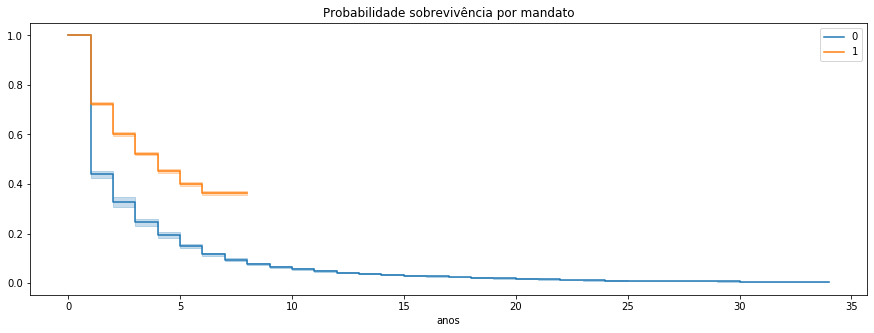

In [175]:
T = dt['anos']
C = dt['abandonou']
curvaSobrevivencia(dt,'esteMandato',C=C,T=T,eixoX='anos',titulo='Probabilidade sobrevivência por mandato');plt.xlabel('anos');

In [176]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt['esteMandato'],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
        7967.44 <0.005       inf


**Existem diferenças entre as curvas de sobrevivência. Vamos ver onde. Isto é como se fosse um teste post-hoc**

In [177]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esteMandato,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1         7967.44 <0.005       inf
